# Vocal detection in audio (With Mixed Samples)
## demonstation on making a model to detect the presence of human voice in audio clips


I will be training a model to determine if there is human vocals present in a clip of audio. This is not to recognize speech, words or anything like that just a simple classification of yes there is human voice or not present in a frame of audio.This is an Expansion of the last vocal classification, in that here I have mixed together the voice samples with background noise. The goal here is to correctly detect that a human voice is present despite the noise.

### Step 1: Data gathering


I have gathered together several types of non human audio from https://research.google.com/audioset//download_strong.html , human audio from librispeech https://www.openslr.org/12 ,  and some additional instramental and singing audio from my private dataset. In all the audio includes birds, thunder, vehicle sounds, instrumental music, singing and talking. This will provide data for what a human voice is not as well as a variation of human vocals with singing. For this first iteration I have split the sudio I have collected into 1 second chunks. I did not check for if this resulted in silence for some samples so that might a point to improve upon later.

In [1]:
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from numpy import where
import glob, os
import random
import math
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

C:\Users\Owner\Anaconda3\envs\vocaloid\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Owner\Anaconda3\envs\vocaloid\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Owner\Anaconda3\envs\vocaloid\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Owner\Anaconda3\envs\vocaloid\lib\site-packages\tensorf

In [2]:
print(tf.config.experimental.list_physical_devices('GPU'))
print(tf.__version__)
import sys
print("Python version")
print (sys.version)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
1.14.0
Python version
3.7.9 (default, Aug 31 2020, 17:10:11) [MSC v.1916 64 bit (AMD64)]


In [3]:
def dataload(classFolder):
    class_labels = []
    class_samples = []
    for file in os.listdir(classFolder):
        
        data = np.load(classFolder+'//'+file)
        print(file)
        for i in data.keys():
            for j in data.get(i):
                class_samples.append(j)
                lab = file.strip(".npz")
                speechLab = ['voice','singing','voiceBird','voiceMusic','voiceVehicle','singingVehicle','singingmusic','']
                if lab in speechLab:
                    class_labels.append("voice")
                else:
                    class_labels.append("not-voice")

    return class_labels, class_samples
def shuffle(class_labels, class_samples):
    temp = list(zip(class_labels, class_samples))
    random.shuffle(temp)
    res1, res2 = zip(*temp)
    # res1 and res2 come out as tuples, and so must be converted to lists.
    res1, res2 = list(res1), list(res2)
    return res1, res2
def encodeLabels(labels):
    label_dict = {}
    cnt = 0
    iter_i = 0
    for i in labels:
        if i in label_dict.keys():
            labels[iter_i] = label_dict[i]
        else:

            label_dict[i] = cnt
            labels[iter_i] = label_dict[i]
            cnt+=1
        iter_i += 1
    return label_dict

Generating class labels and sample list. shuffle it and encode labels into integers. Here I have my base audio classes;
Non-Voice:
birds,
instramental music,
vehicle

Voice:
singing,
voice

Then I have merged several together in order for the model to learn if a voice is present even among background noise

Hybrid classes:
singing with music,
singing with vehicle,
voice with birds,
voice with vehicle


In [4]:
class_labels, class_samples = dataload(os.getcwd()+'\\extract')

birds.npz
instramentalMusic.npz
singing.npz
singingmusic.npz
singingVehicle.npz
vehicle.npz
voice.npz
voiceBird.npz
voiceMusic.npz
voiceVehicle.npz


### Data preview

In [5]:
print("Number of 0.5 second samples:")
print(len(class_samples))
v1 = 0
v2 = 0
mark_voice = []
for i in range(len(class_labels)):
    if class_labels[i] == 'voice':
        v1+=1
        mark_voice.append(i)
    else:
        v2+=1
print("Number of voice samples:")
print(v1)
print("Number of other sound samples:")
print(v2)

Number of 0.5 second samples:
99698
Number of voice samples:
55778
Number of other sound samples:
43920


voice


C:\Users\Owner\Anaconda3\envs\vocaloid\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\Owner\Anaconda3\envs\vocaloid\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


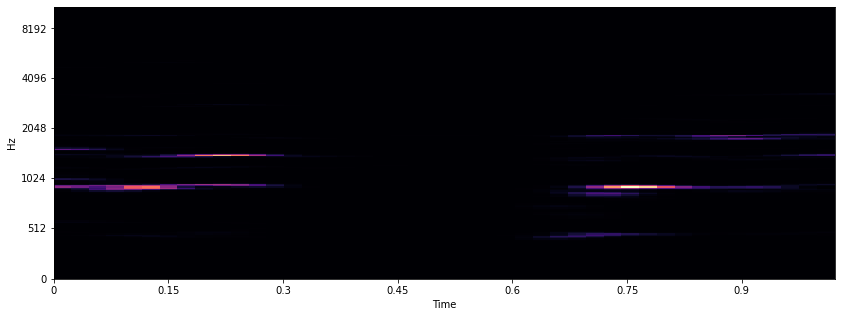

In [6]:
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.specshow(class_samples[mark_voice[5050]],x_axis='time', y_axis='mel')
print(class_labels[mark_voice[5050]])

In [7]:
import IPython.display as ipd

ipd.Audio(librosa.feature.inverse.mel_to_audio(class_samples[mark_voice[5050]]),rate=22050)

In [9]:
encoder = LabelEncoder()
y = encoder.fit_transform(class_labels)
scaler = StandardScaler()
#x = scaler.fit_transform(class_samples)
class_samples = np.expand_dims(class_samples, axis=-1)
x_train, x_val, y_train, y_val = train_test_split(class_samples, y, test_size=0.2) #this also shuffles

In [10]:
####

In [8]:
class_labels, class_samples = shuffle(class_labels,class_samples)
#class_samples = np.expand_dims(class_samples, axis=-1)
label_dict = encodeLabels(class_labels)
print(label_dict)

{'not-voice': 0, 'voice': 1}


Split samples, 80% for training and 20% for validation

In [9]:
split_percent = 80
split_index = math.floor((len(class_labels)/100)*split_percent)

train_labels = np.asarray(class_labels[:split_index]) 
test_labels = np.asarray(class_labels[split_index :])
train_samples = np.asarray(class_samples[:split_index],dtype='float32')
test_samples = np.asarray(class_samples[split_index :],dtype='float32')

print(train_labels.shape)
print(train_samples.shape)

(79758,)
(79758, 256, 44, 1)


In [10]:
input_shape = class_samples[0].shape
input_shape

(256, 44, 1)

## MODEL 1 

In [11]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=input_shape),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 11264)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1441920   
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
Total params: 1,442,178
Trainable params: 1,442,178
Non-trainable params: 0
_________________________________________________________________


## Training the model

In [36]:
EPOCHS = 10
H = model.fit(x_train,
              y_train,
              epochs=EPOCHS,
              batch_size=100,
              validation_data=(x_val, y_val))
test_loss, test_acc = model.evaluate(x_val,  y_val, verbose=2)

Train on 79758 samples, validate on 19940 samples
Epoch 1/10
79758/79758 [==============================] - 28s 354us/sample - loss: 1.1992 - acc: 0.6761 - val_loss: 0.6577 - val_acc: 0.6891
Epoch 2/10
79758/79758 [==============================] - 23s 291us/sample - loss: 0.6240 - acc: 0.7122 - val_loss: 0.6278 - val_acc: 0.7161
Epoch 3/10
79758/79758 [==============================] - 21s 258us/sample - loss: 0.5775 - acc: 0.7328 - val_loss: 0.5896 - val_acc: 0.7110
Epoch 4/10
79758/79758 [==============================] - 18s 230us/sample - loss: 0.5447 - acc: 0.7500 - val_loss: 0.5727 - val_acc: 0.7472
Epoch 5/10
79758/79758 [==============================] - 16s 200us/sample - loss: 0.5310 - acc: 0.7622 - val_loss: 0.5990 - val_acc: 0.7490
Epoch 6/10
79758/79758 [==============================] - 14s 178us/sample - loss: 0.5217 - acc: 0.7737 - val_loss: 0.6473 - val_acc: 0.7679
Epoch 7/10
79758/79758 [==============================] - 13s 169us/sample - loss: 0.5008 - acc: 0.7867 

In [37]:
print(H.history)

{'loss': [1.1991519329645273, 0.6239828091564925, 0.5775107485272197, 0.5447250413674642, 0.5310239937051721, 0.5216686610088458, 0.5007735204732825, 0.48125581686151, 0.5144240777530308, 0.49666066998395636], 'acc': [0.6761453, 0.71217936, 0.73280424, 0.75001884, 0.76216805, 0.7736653, 0.7867048, 0.79565686, 0.7966599, 0.80070966], 'val_loss': [0.6576641012457691, 0.6277897540580784, 0.5895814976338278, 0.5727090544722144, 0.5989664953833478, 0.6472620741653825, 0.6275486122282482, 0.5949574832990392, 0.7413623699154275, 0.697014127625386], 'val_acc': [0.6890672, 0.71614844, 0.710983, 0.74724174, 0.74904716, 0.7679037, 0.7718656, 0.7671515, 0.7768305, 0.7671515]}


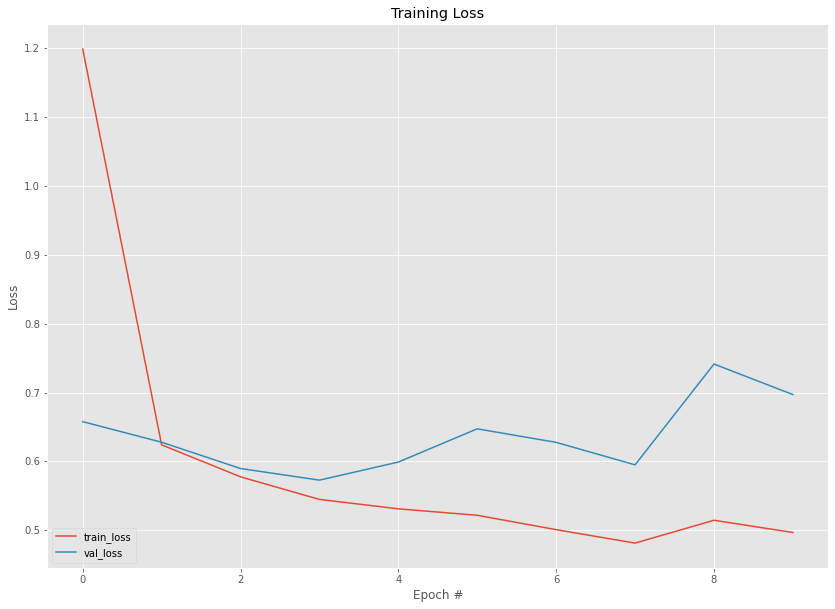

In [38]:
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize=(14,10))
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="lower left")
plt.show()

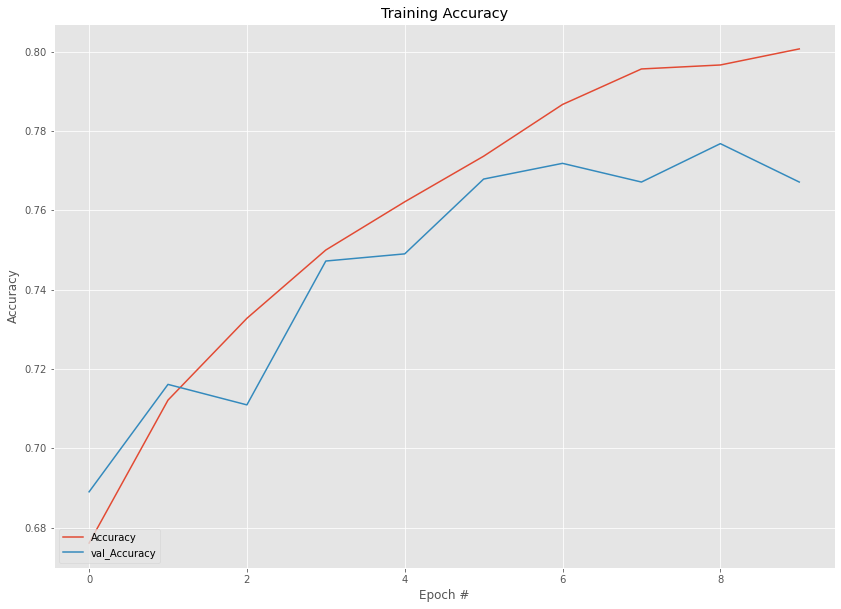

In [39]:
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize=(14,10))
plt.plot(N, H.history["acc"], label="Accuracy")
plt.plot(N, H.history["val_acc"], label="val_Accuracy")
plt.title("Training Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="lower left")
plt.show()

### MODEL 2

In [40]:
model = models.Sequential([
    layers.Input(shape=input_shape),
    # Downsample the input.
    #layers.Resizing(128, 56),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(2),
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 42, 64)       640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 21, 64)       0         
_________________________________________________________________
dropout (Dropout)            (None, 127, 21, 64)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 19, 32)       18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 9, 32)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 62, 9, 32)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 17856)            

In [41]:
EPOCHS = 10
H = model.fit(x_train,
              y_train,
              epochs=EPOCHS,
              batch_size=100,
              validation_data=(x_val, y_val))
test_loss, test_acc = model.evaluate(x_val,  y_val, verbose=2)

Train on 79758 samples, validate on 19940 samples
Epoch 1/10
79758/79758 [==============================] - 671s 8ms/sample - loss: 0.5234 - acc: 0.7837 - val_loss: 0.3030 - val_acc: 0.8890
Epoch 2/10
71700/79758 [=========================>....] - ETA: 1:04 - loss: 0.2946 - acc: 0.8778

KeyboardInterrupt: 

In [12]:
print(H.history)

{'loss': [0.5301226577088534, 0.3184397378789048, 0.2680384653826565, 0.23732783086714687, 0.22058309988504535, 0.20736553226436116, 0.19483951077344602, 0.1864234669367885, 0.17422835044064916, 0.16679745564432147], 'acc': [0.76537776, 0.87193763, 0.89083225, 0.90221673, 0.91032875, 0.91526866, 0.9204343, 0.9244966, 0.92986286, 0.9331728], 'val_loss': [0.32227395158055555, 0.2620348612158564, 0.2325894869228782, 0.20865974680650437, 0.19098997150464667, 0.18214669328186672, 0.16937590288811008, 0.17923744500370897, 0.16280050643737481, 0.1663782003306697], 'val_acc': [0.88164496, 0.8826981, 0.90160483, 0.9142929, 0.9212638, 0.9216148, 0.92973924, 0.92999, 0.9362086, 0.9377633]}


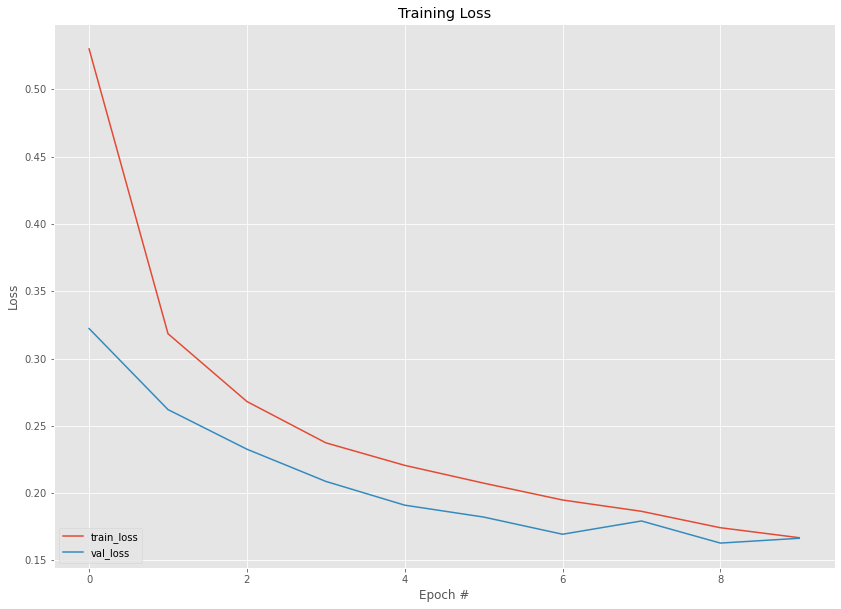

In [13]:
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize=(14,10))
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="lower left")
plt.show()

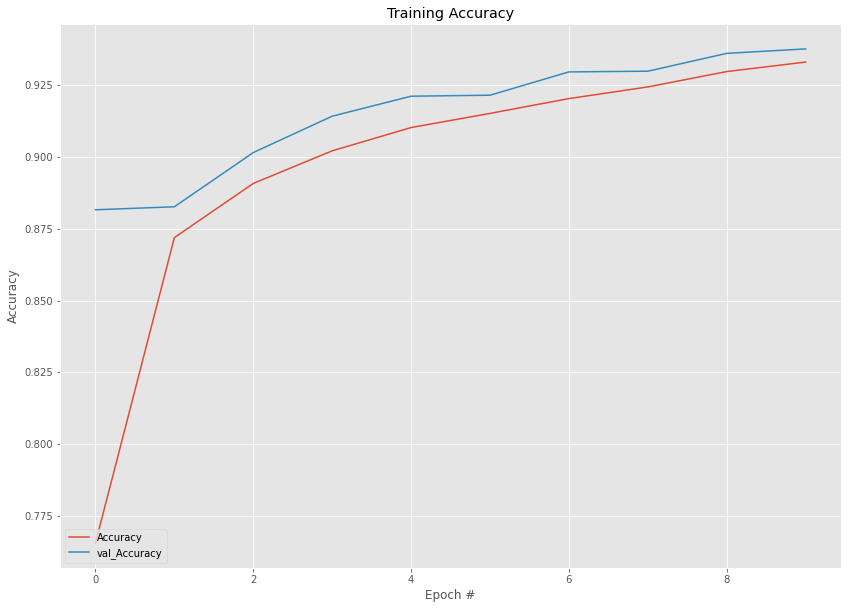

In [14]:
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize=(14,10))
plt.plot(N, H.history["acc"], label="Accuracy")
plt.plot(N, H.history["val_acc"], label="val_Accuracy")
plt.title("Training Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="lower left")
plt.show()

In [16]:
model.save('models/my_model')

Recall the sample displayed earlier ,test_label[5000] , lets see what the model says

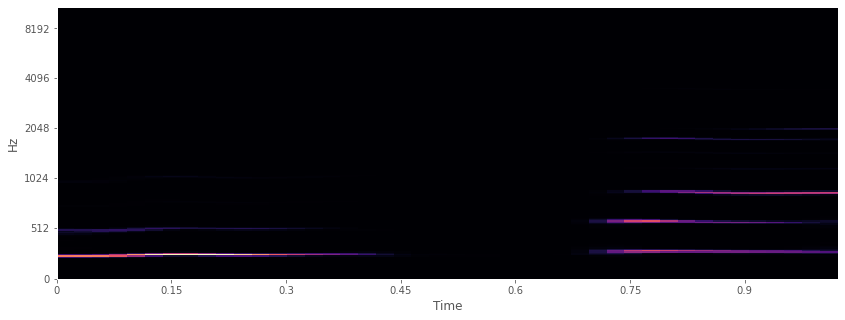

In [31]:
import IPython.display as ipd
plt.figure(figsize=(14, 5))
t1 = np.squeeze(class_samples[mark_voice[150]], axis=-1)
librosa.display.specshow(t1,x_axis='time', y_axis='mel')
ipd.Audio(librosa.feature.inverse.mel_to_audio(t1),rate=22050)

In [32]:
test_preds = np.asarray(class_samples[mark_voice[150]:mark_voice[160]])
predictions = model.predict(test_preds)
print(predictions)

[[-10.445031     0.72868025]
 [ -1.7844689   -0.8425429 ]
 [ -8.451431     3.968381  ]
 [ -4.723521     0.08074127]
 [ -5.1144133   -0.30876216]
 [ -8.21116     -0.0946441 ]
 [-10.779693     5.65548   ]
 [ -4.285221     3.459373  ]
 [ -8.516917     3.2696047 ]
 [ -4.029064     1.1788663 ]]


In [25]:
t2 = (np.expand_dims(class_samples[mark_voice[5001]],0))
predictions = model.predict(t2)
print(np.argmax(predictions[0]))

1


In [26]:
a = np.asarray(np.argmax(predictions[0]))
a = np.expand_dims(a,axis=-1)
print(encoder.inverse_transform(a))

['voice']


## Data augmentation and application

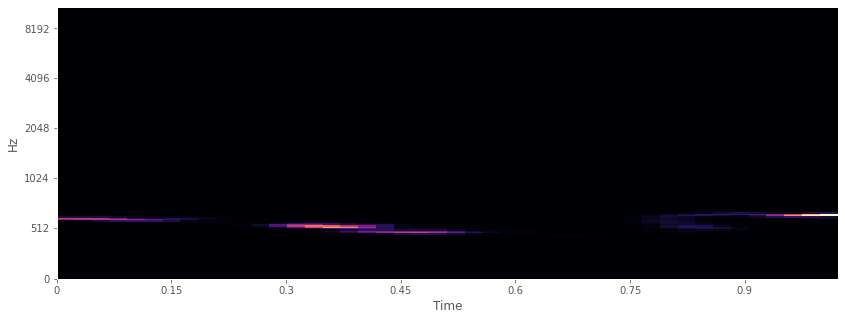

In [27]:
plt.figure(figsize=(14, 5))
t3 = np.squeeze(class_samples[2444], axis=-1)
librosa.display.specshow(t3,x_axis='time', y_axis='mel')
ipd.Audio(librosa.feature.inverse.mel_to_audio(t3),rate=22050)

(11008,)


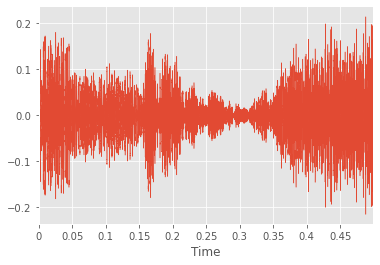

In [33]:
x1 = librosa.feature.inverse.mel_to_audio(t1)
x2 = librosa.feature.inverse.mel_to_audio(t3)

# MERGE
x3 = (x1+x2)/2
x3 = librosa.effects.time_stretch(x3, rate=2.0)
print(x3.shape)
librosa.display.waveplot(x3, sr=22050)

# REPRODUCE
ipd.Audio(x3, rate=22050)

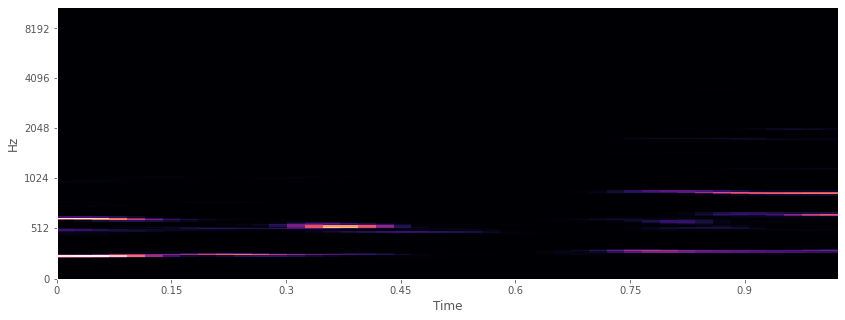

In [34]:
n_fft = 2048
hop_length = 256
win_length=n_fft
n_mels =256
x3 = librosa.feature.melspectrogram(x3,n_fft=n_fft,hop_length=hop_length,win_length=win_length,n_mels=n_mels)
plt.figure(figsize=(14, 5))
librosa.display.specshow(x3,x_axis='time', y_axis='mel')

In [35]:
x3 = np.expand_dims(x3,-1)
print(x3.shape)

tt = np.expand_dims(x3,0)
print(tt.shape)
predictions = model.predict(tt)
print(predictions)
print(np.argmax(predictions[0]))

a = np.asarray(np.argmax(predictions[0]))
a = np.expand_dims(a,axis=-1)
print(encoder.inverse_transform(a))

(256, 44, 1)
(1, 256, 44, 1)
[[-3.6859543   0.09151655]]
1
['voice']


### Conclusion:
will need to augment data with voice mixed with noise to get better results

In [13]:
model = models.Sequential([
    layers.Input(shape=input_shape),
    # Downsample the input.
    #layers.Resizing(128, 56),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    layers.Conv2D(16, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(2),
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 42, 32)       320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 21, 32)       0         
_________________________________________________________________
dropout (Dropout)            (None, 127, 21, 32)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 19, 16)       4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 9, 16)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 62, 9, 16)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8928)             

In [14]:
EPOCHS = 10
H = model.fit(x_train,
              y_train,
              epochs=EPOCHS,
              batch_size=100,
              validation_data=(x_val, y_val))
test_loss, test_acc = model.evaluate(x_val,  y_val, verbose=2)

Train on 79758 samples, validate on 19940 samples
Epoch 1/10
79758/79758 [==============================] - 286s 4ms/sample - loss: 0.6571 - acc: 0.6218 - val_loss: 0.5097 - val_acc: 0.7660
Epoch 2/10
79758/79758 [==============================] - 285s 4ms/sample - loss: 0.5023 - acc: 0.7353 - val_loss: 0.3942 - val_acc: 0.8693
Epoch 3/10
79758/79758 [==============================] - 285s 4ms/sample - loss: 0.4159 - acc: 0.7964 - val_loss: 0.3176 - val_acc: 0.8746
Epoch 4/10
79758/79758 [==============================] - 285s 4ms/sample - loss: 0.3728 - acc: 0.8191 - val_loss: 0.2925 - val_acc: 0.8902
Epoch 5/10
79758/79758 [==============================] - 285s 4ms/sample - loss: 0.3449 - acc: 0.8392 - val_loss: 0.2835 - val_acc: 0.8845
Epoch 6/10
79758/79758 [==============================] - 285s 4ms/sample - loss: 0.3183 - acc: 0.8629 - val_loss: 0.2439 - val_acc: 0.8964
Epoch 7/10
79758/79758 [==============================] - 284s 4ms/sample - loss: 0.2997 - acc: 0.8724 - val_l

In [15]:
print(H.history)

{'loss': [0.6571451772666957, 0.5023160062538065, 0.41586591822622937, 0.37284126595896117, 0.34489450818969997, 0.31832868695100663, 0.29965107529849516, 0.28396431754709095, 0.2647454404173143, 0.252797498434028], 'acc': [0.62183106, 0.7353369, 0.7963966, 0.81905264, 0.8392136, 0.86286014, 0.87238896, 0.88012487, 0.88923997, 0.8953083], 'val_loss': [0.5097351191096464, 0.39419919171687234, 0.31764716249232067, 0.2924791448184456, 0.28345850691453384, 0.24389949420031717, 0.231963741848079, 0.22749247429602842, 0.22277731017219865, 0.21006524822148778], 'val_acc': [0.76604813, 0.86925775, 0.8746239, 0.8901705, 0.8845035, 0.8963892, 0.90075225, 0.9035607, 0.9101304, 0.911334]}


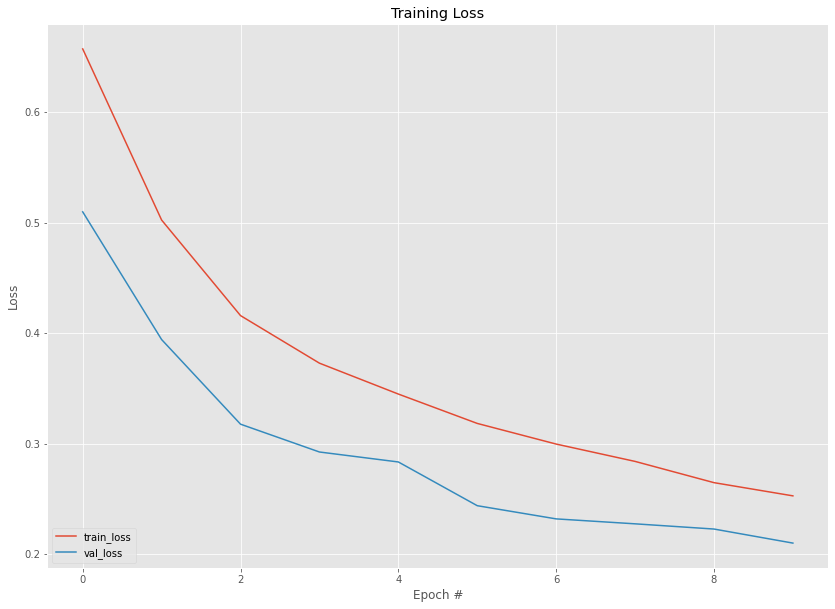

In [16]:
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize=(14,10))
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="lower left")
plt.show()

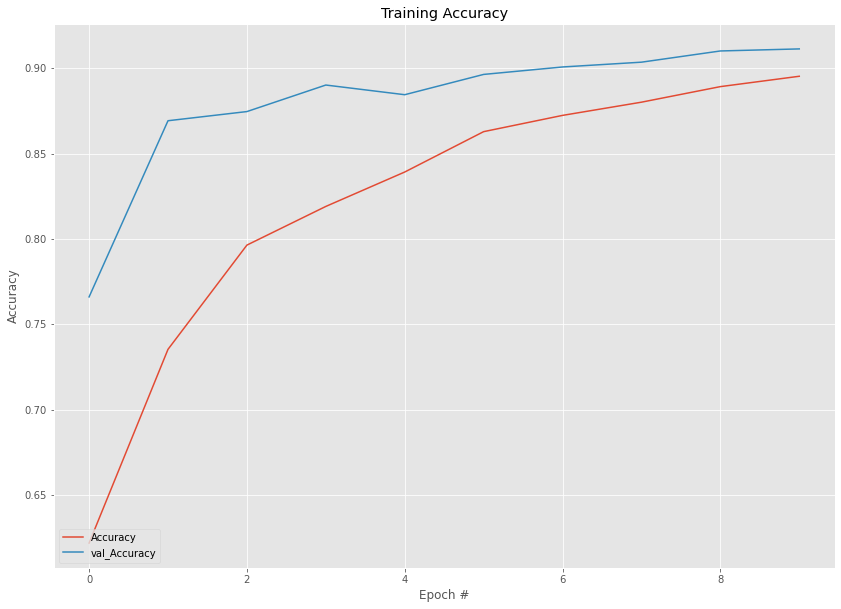

In [17]:
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize=(14,10))
plt.plot(N, H.history["acc"], label="Accuracy")
plt.plot(N, H.history["val_acc"], label="val_Accuracy")
plt.title("Training Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="lower left")
plt.show()

In [18]:
model = models.Sequential([
    layers.Input(shape=input_shape),
    # Downsample the input.
    #layers.Resizing(128, 56),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    layers.Conv2D(16, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(8, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(2),
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 254, 42, 32)       320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 127, 21, 32)       0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 127, 21, 32)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 125, 19, 16)       4624      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 62, 9, 16)         0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 62, 9, 16)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8928)             

In [19]:
EPOCHS = 10
H = model.fit(x_train,
              y_train,
              epochs=EPOCHS,
              batch_size=100,
              validation_data=(x_val, y_val))
test_loss, test_acc = model.evaluate(x_val,  y_val, verbose=2)

Train on 79758 samples, validate on 19940 samples
Epoch 1/10
79758/79758 [==============================] - 296s 4ms/sample - loss: 0.6397 - acc: 0.6015 - val_loss: 0.5227 - val_acc: 0.8035
Epoch 2/10
79758/79758 [==============================] - 289s 4ms/sample - loss: 0.4794 - acc: 0.7846 - val_loss: 0.3316 - val_acc: 0.8847
Epoch 3/10
16600/79758 [=====>........................] - ETA: 3:39 - loss: 0.4060 - acc: 0.8242

KeyboardInterrupt: 

In [36]:
print(H.history)

{'loss': [0.7052896184456612, 0.6286752432201388, 0.5851053734275151, 0.453928812983677, 0.3586772665448317, 0.328670166843696, 0.31724798601705395, 0.3115152448483762, 0.3028983158753047, 0.29939918322388476], 'acc': [0.5632413, 0.57603, 0.63657564, 0.7598109, 0.8405301, 0.85607713, 0.85922414, 0.8622583, 0.86645854, 0.86830163], 'val_loss': [0.6163583717709679, 0.5659363957321871, 0.4391904056311371, 0.31911064497566033, 0.2852433244646373, 0.2600323097666384, 0.2739628990859899, 0.24365332546301088, 0.2290239284336268, 0.2256605016551501], 'val_acc': [0.5732698, 0.62637913, 0.863992, 0.8905216, 0.8762287, 0.8925276, 0.8834002, 0.90165496, 0.90456367, 0.8965396]}


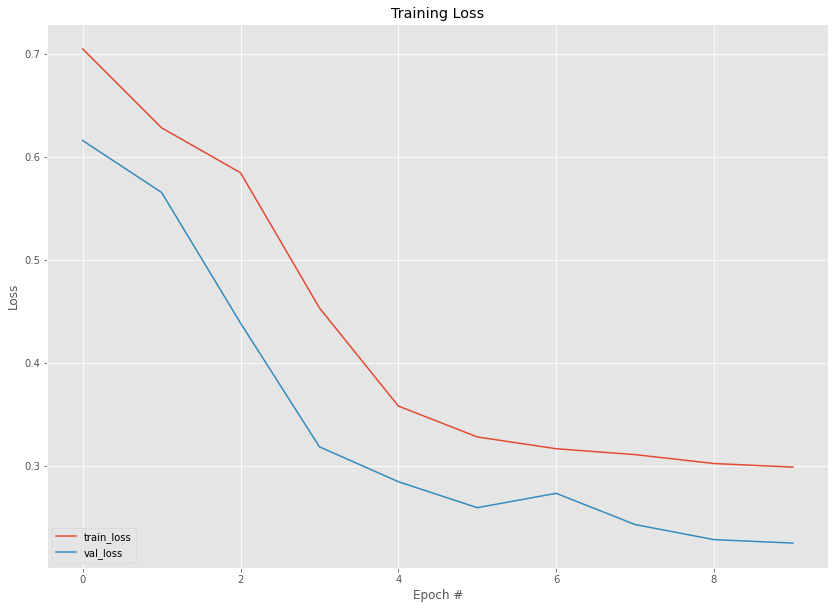

In [37]:
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize=(14,10))
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="lower left")
plt.show()

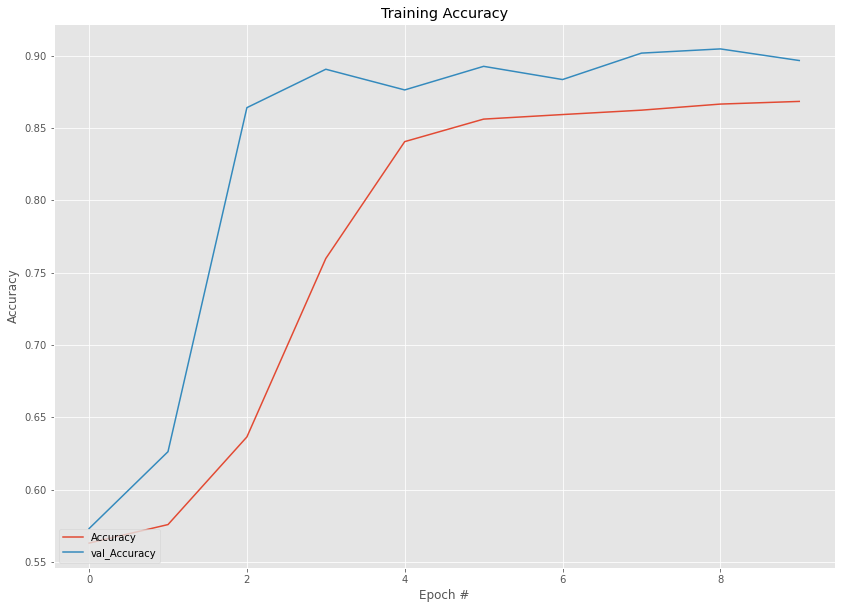

In [38]:
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize=(14,10))
plt.plot(N, H.history["acc"], label="Accuracy")
plt.plot(N, H.history["val_acc"], label="val_Accuracy")
plt.title("Training Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="lower left")
plt.show()